#**Osservazioni sulle vendite mensili di prodotti dei settori Calcio, Pesca e Casual**



In [ ]:
#https://github.com/TommasoStrada/Progetto-Data-Science-Lab

The XGBoost (eXtreme Gradient Boosting) is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm that attempts to accurately predict a target variable by combining an ensemble of estimates from a set of simpler and weaker models. The XGBoost algorithm performs well in machine learning competitions because of its robust handling of a variety of data types, relationships, distributions, and the variety of hyperparameters that you can fine-tune. You can use XGBoost for regression, classification (binary and multiclass), and ranking problems.

# **COSE DA SETTARE DOPO AVER COPIATO IL CODICE IN FUNZIONE DELLE DIVERSE GRANULARITA':**
- repo_alessandro_calcio --> nome aggregazione
- uso delle repo del team
- scommentare il cambio di tipo nella data: ds_calcio_annuale['year'] = pd.to_datetime(ds_calcio_annuale['year'])
- cambiare i nome delle variabili temporali in month, trimestre e week
- nomi features, legenda e titolo nei plot
- cosa vogliamo come altre misure di bonta delle predizioni
- sistemare asse y con valore delle vendite più leggibile rispetto alla notazione esponenziale
- Lista di params modificata che cambiamo dopo un primo giro di run per raccogliere i dati su cambiamenti di performance e i plot da inserire nel record per i confronti e le dimostrazioni di cura delle performance

In [ ]:
#!pip install xgboost 1.6

In [ ]:
import math
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost

In [ ]:
shift_mensile = 1        #mese precedente
shift_annuale = 12       #stesso mese, anno precedente
shift_scelto = shift_mensile

In [ ]:
repo_alessandro_calcio = "https://github.com/Alessandro-Fasani/DsLab/raw/main/calcio_mensile.csv"
repo_alessandro_pesca = "https://github.com/Alessandro-Fasani/DsLab/raw/main/pesca_mensile.csv"
repo_alessandro_casual = "https://github.com/Alessandro-Fasani/DsLab/raw/main/casual_mensile.csv"

repo_team_calcio = ""
repo_team_pesca = ""
repo_team_casual = ""

In [ ]:
ds_calcio = pd.read_csv(repo_alessandro_calcio)
ds_pesca = pd.read_csv(repo_alessandro_pesca)
ds_casual = pd.read_csv(repo_alessandro_casual)

In [ ]:
porzione_test = round(len(ds_calcio) * 0.2)       # 20% circa verra usato per il test 
porzione_test_casual = round(len(ds_casual) * 0.2) 

ds_casual.head(50)

,Unnamed: 0,year,revenue
0,0,2014-01-31,6863.44
1,1,2014-02-28,141796.91
2,2,2014-03-31,470230.18
3,3,2014-04-30,371651.71
4,4,2014-05-31,315736.45
5,5,2014-06-30,198836.44
6,6,2014-07-31,469731.71
7,7,2014-08-31,265417.48
8,8,2014-09-30,398348.58
9,9,2014-10-31,305739.68


In [ ]:
ds_calcio['year'] = pd.to_datetime(ds_calcio['year'])
ds_pesca['year'] = pd.to_datetime(ds_pesca['year'])
ds_casual['year'] = pd.to_datetime(ds_casual['year'])
ds_calcio.dtypes

year       datetime64[ns]
revenue           float64
dtype: object

In [ ]:
print("xgboost versione numero: ", xgboost.__version__)

xgboost versione numero:  0.90


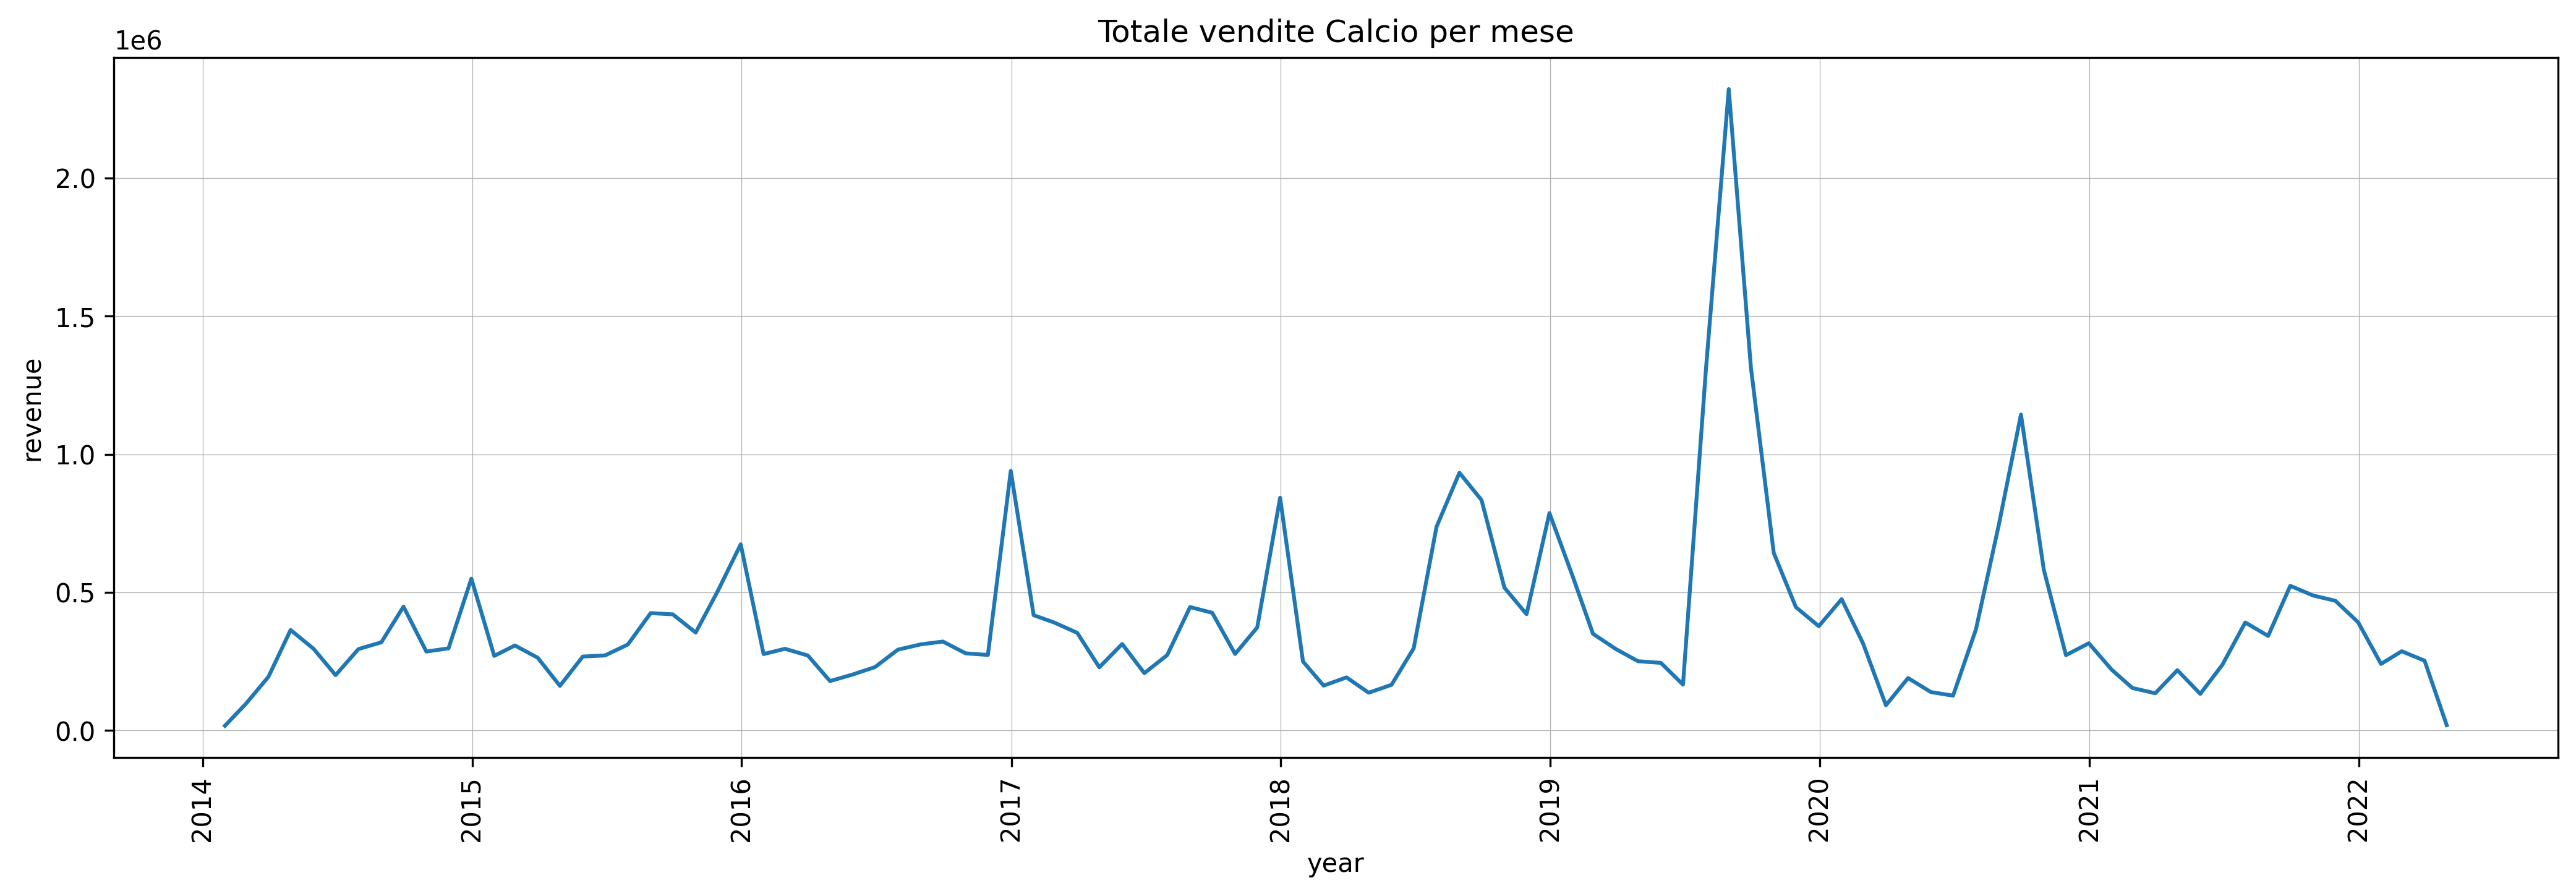

In [ ]:
plt.rcParams.update({'figure.figsize': (17, 5), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_calcio, x='year',  y='revenue')
plt.grid(linestyle='-', linewidth=0.3)
plt.title("Totale vendite Calcio per mese")
ax.tick_params(axis='x', rotation=90)

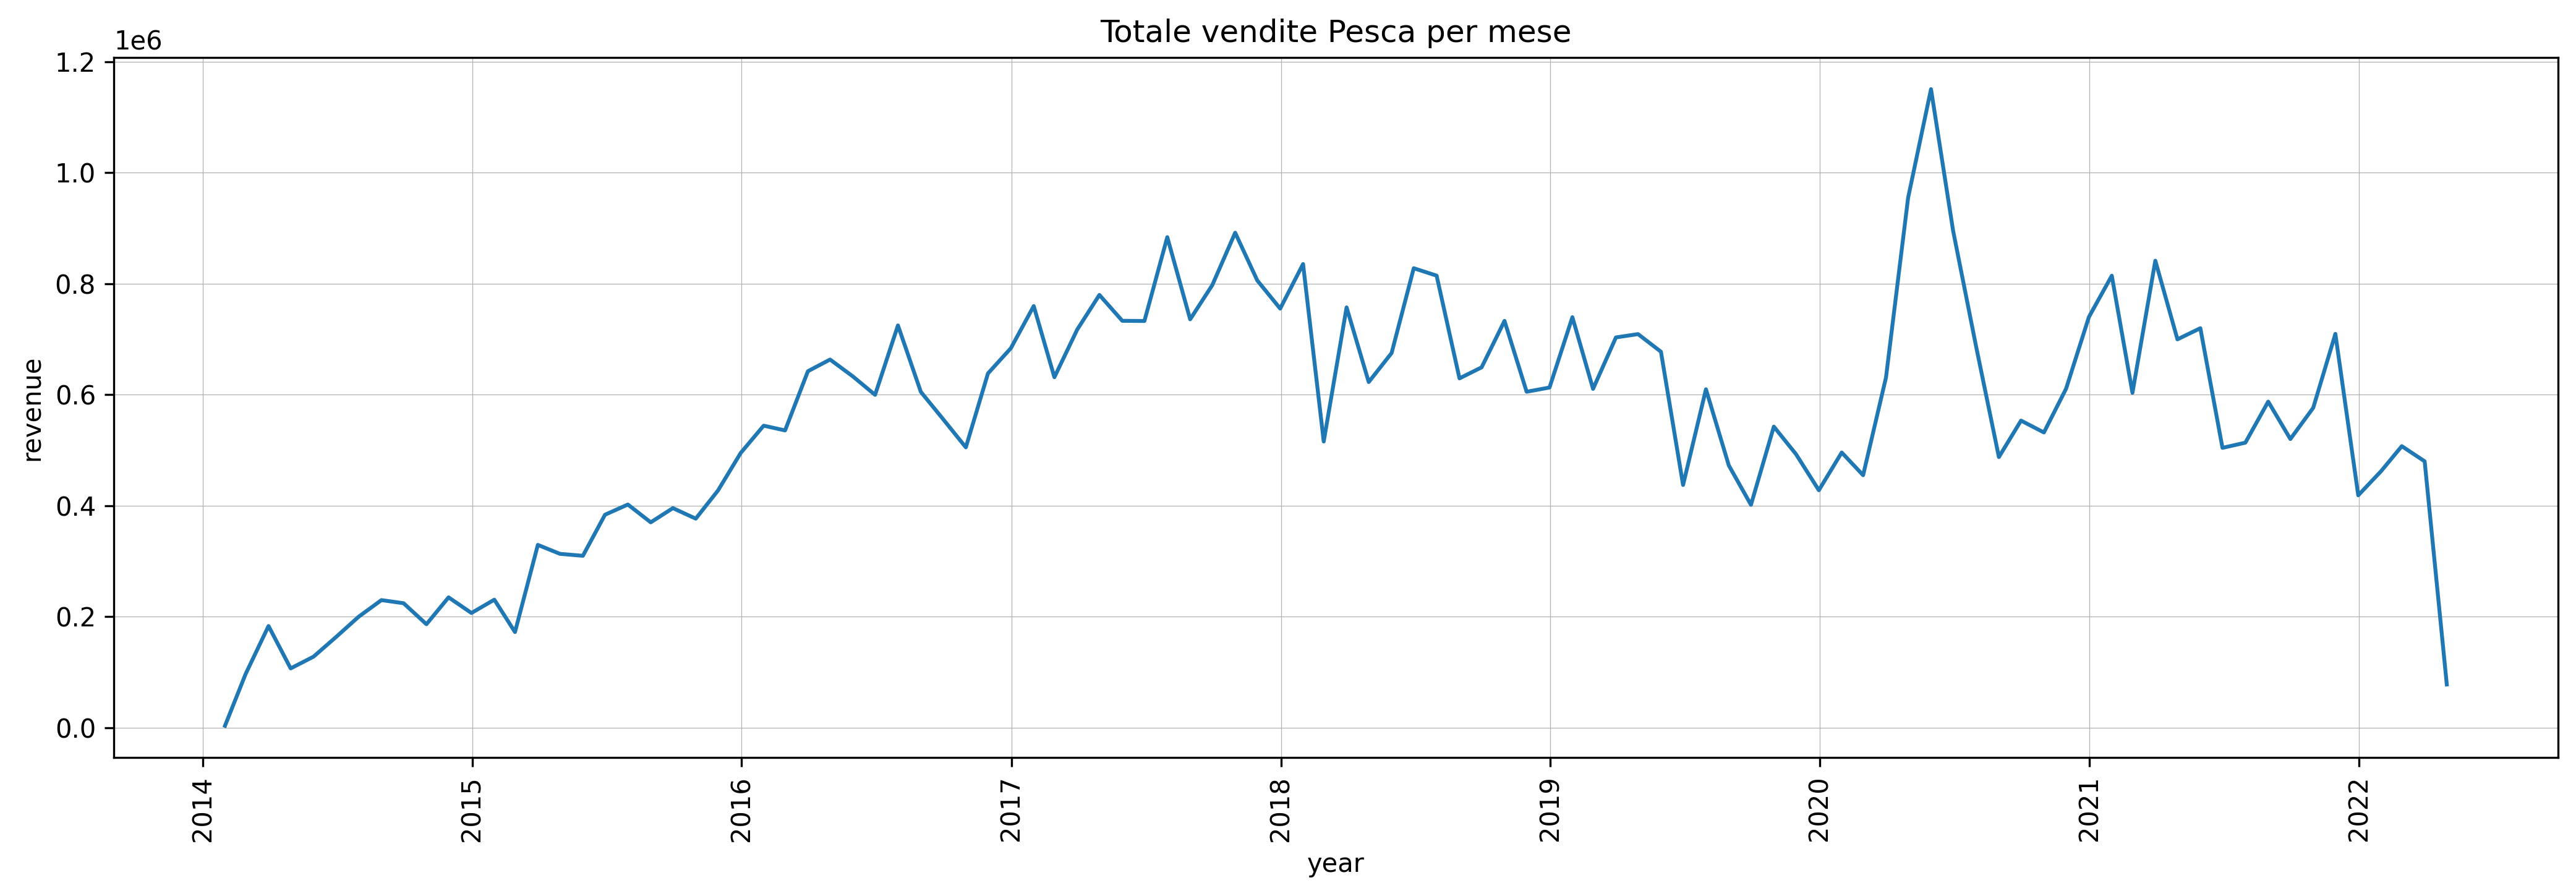

In [ ]:
plt.rcParams.update({'figure.figsize': (17, 5), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_pesca, x='year',  y='revenue')
plt.grid(linestyle='-', linewidth=0.3)
plt.title("Totale vendite Pesca per mese")
ax.tick_params(axis='x', rotation=90)

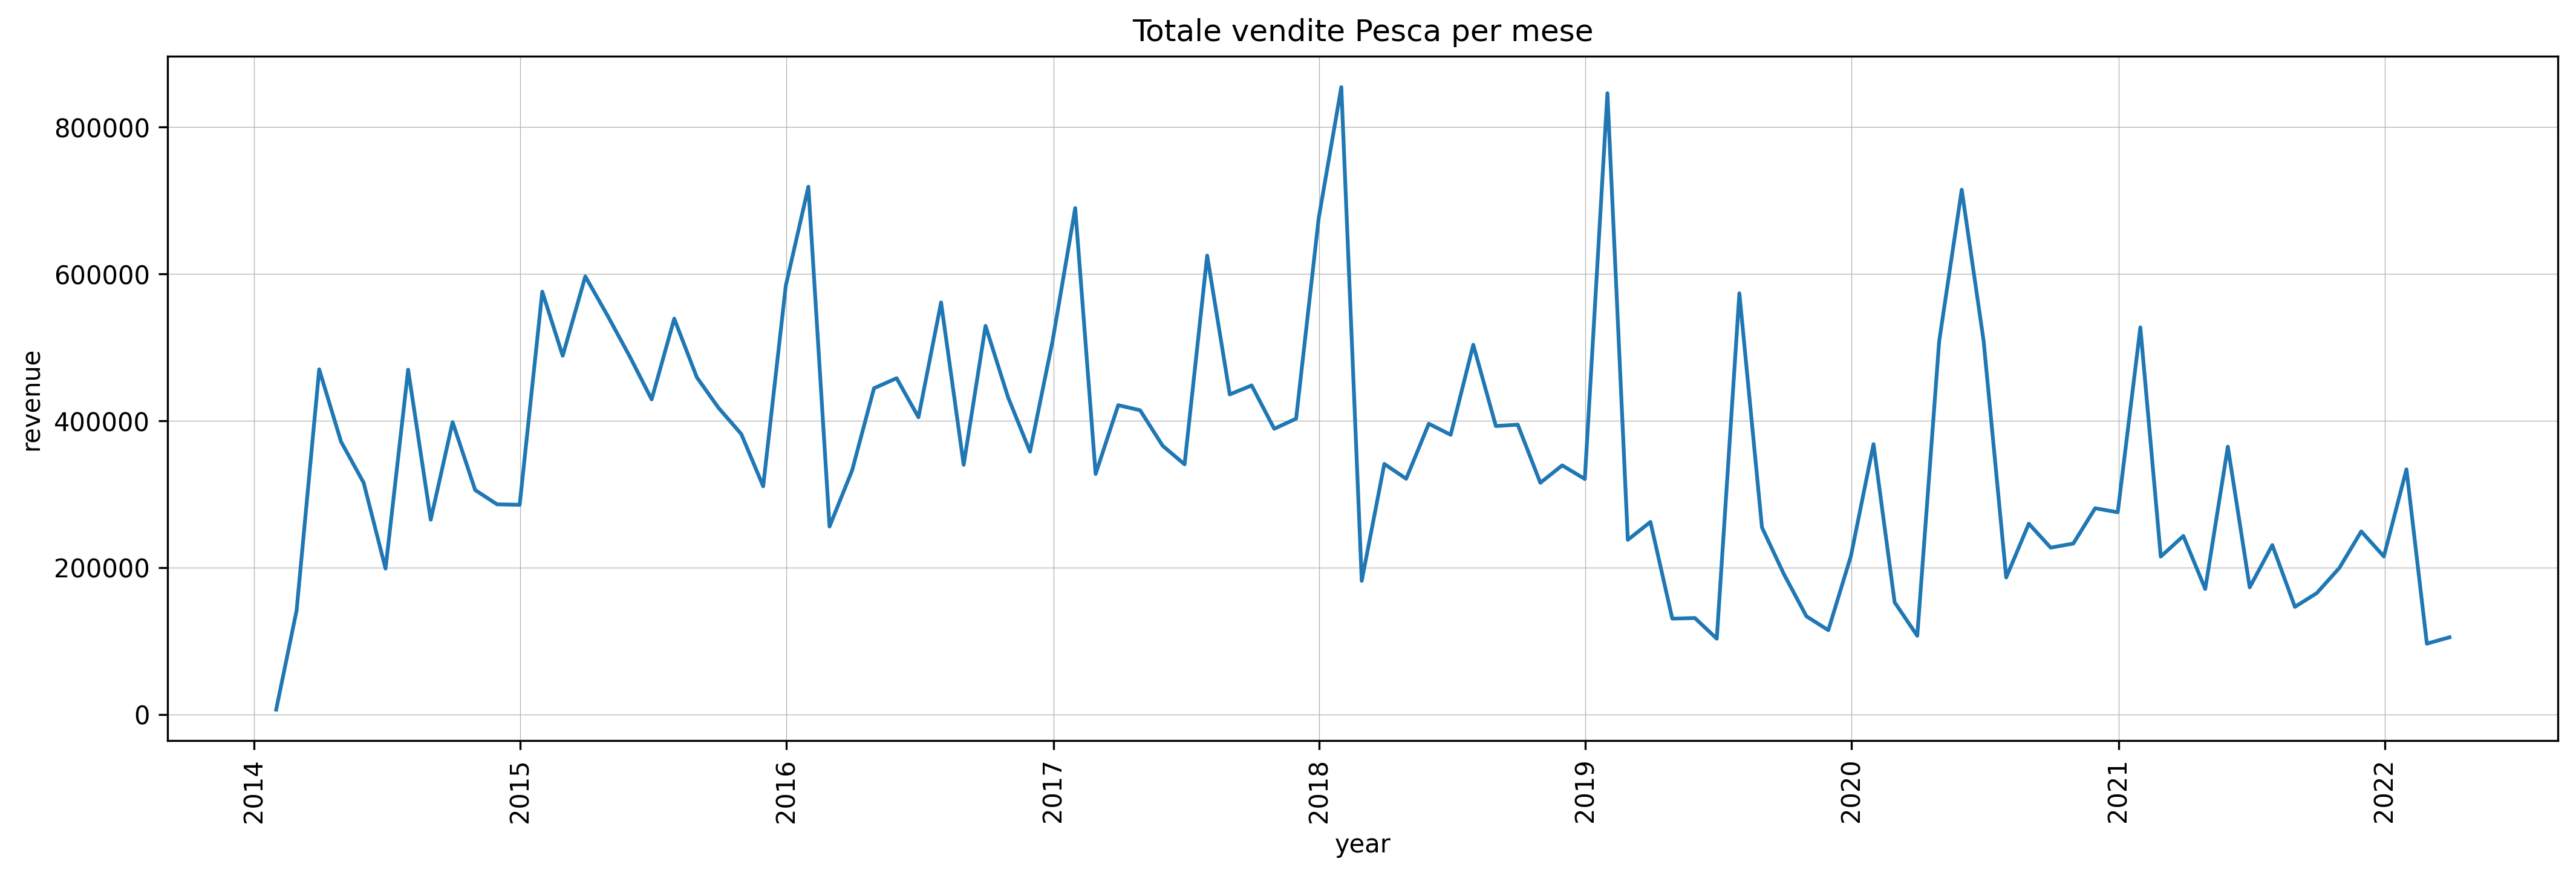

In [ ]:
plt.rcParams.update({'figure.figsize': (17, 5), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_casual, x='year',  y='revenue')
plt.title("Totale vendite Pesca per mese")
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [ ]:
ds_calcio["totale_periodo_prec"] = ds_calcio["revenue"].shift(+shift_scelto)
ds_pesca["totale_periodo_prec"] = ds_pesca["revenue"].shift(+shift_scelto)
ds_casual["totale_periodo_prec"] = ds_casual["revenue"].shift(+shift_scelto)

ds_casual = ds_casual[["year","totale_periodo_prec","revenue"]]

ds_calcio= ds_calcio.dropna()  
ds_pesca= ds_pesca.dropna()    
ds_casual= ds_casual.dropna()


print(ds_calcio.shape)
print(ds_pesca.shape)
print(ds_casual.shape)

(99, 3)
(99, 3)
(98, 3)


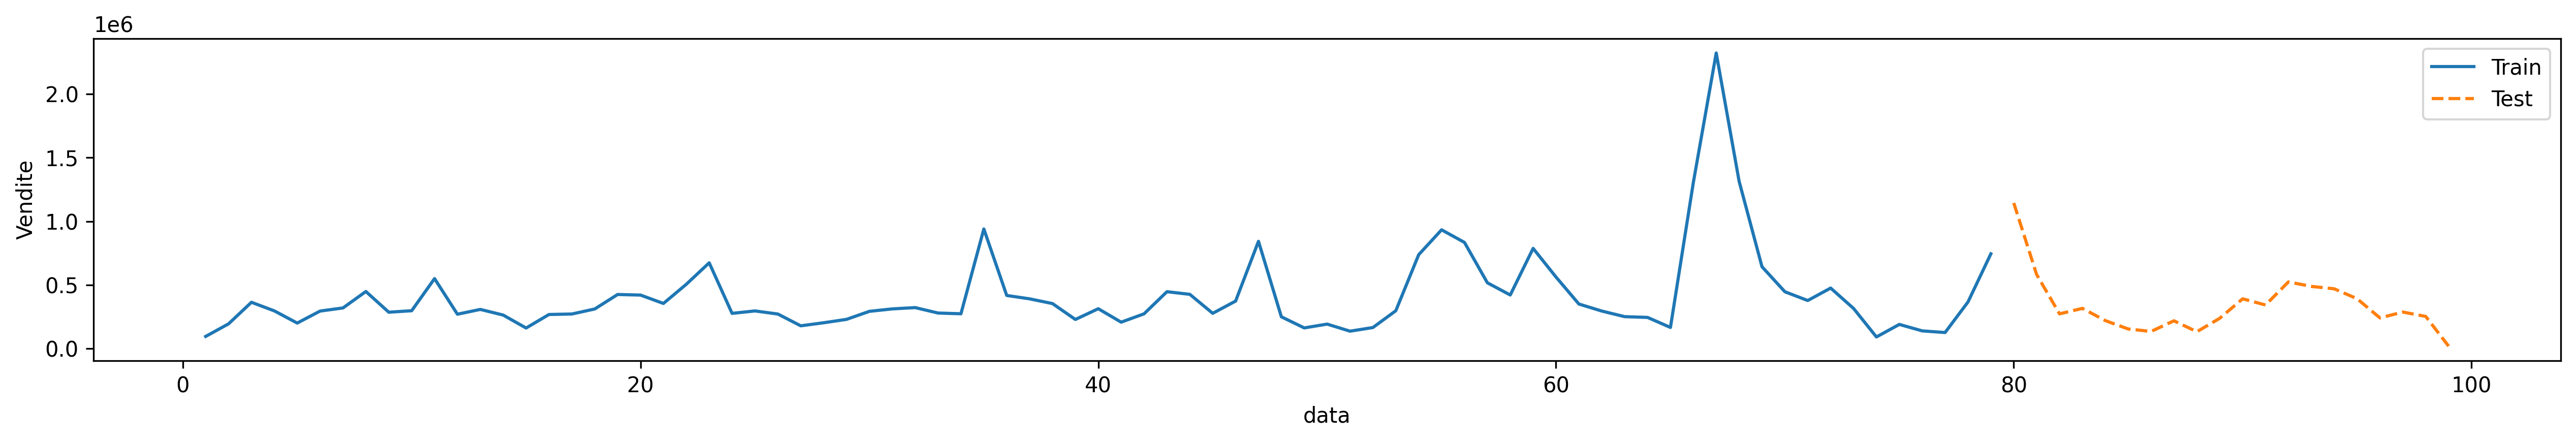

In [ ]:
#LIST INPUT, divisione tra parte train e parte dedicata al test
x_calcio = ds_calcio[['totale_periodo_prec']]
x_pesca = ds_pesca[['totale_periodo_prec']]
x_casual = ds_casual[['totale_periodo_prec']]

x_calcio_to_train = x_calcio.iloc[:(len(x_calcio)-porzione_test)]
x_pesca_to_train = x_pesca.iloc[:(len(x_pesca)-porzione_test)]
x_casual_to_train = x_casual.iloc[:(len(x_casual)-porzione_test_casual)]


x_calcio_to_test = x_calcio.iloc[(len(x_calcio)-porzione_test):]
x_pesca_to_test = x_pesca.iloc[(len(x_pesca)-porzione_test):]
x_casual_to_test = x_casual.iloc[(len(x_casual)-porzione_test_casual):]


#LIST OUTPUT, divisione tra parte train e parte dedicata al test
y_calcio = ds_calcio[['revenue']]
y_pesca = ds_pesca[['revenue']]
y_casual = ds_casual[['revenue']]

y_calcio_to_train = y_calcio.iloc[:(len(y_calcio)-porzione_test)]
y_pesca_to_train = y_pesca.iloc[:(len(y_pesca)-porzione_test)]
y_casual_to_train = y_casual.iloc[:(len(y_casual)-porzione_test_casual)]


y_calcio_to_test = y_calcio.iloc[(len(y_calcio)-porzione_test):]
y_pesca_to_test = y_pesca.iloc[(len(y_pesca)-porzione_test):]
y_casual_to_test = y_casual.iloc[(len(y_casual)-porzione_test_casual):]


fig, ax = plt.subplots(figsize=(17, 3))
ax.plot(y_calcio_to_train, ls='-', label='Train')
ax.plot(y_calcio_to_test, ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
estimator_calcio = XGBRegressor(objective='reg:squarederror', n_estimators=150, learning_rate=0.01)
estimator_pesca = XGBRegressor(objective='reg:squarederror', n_estimators=150, learning_rate=0.01)
estimator_casual = XGBRegressor(objective='reg:squarederror', n_estimators=150, learning_rate=0.01)

estimator_calcio.fit(x_calcio_to_train, y_calcio_to_train,
              eval_set=[(x_calcio_to_train, y_calcio_to_train), (x_calcio_to_test, y_calcio_to_test)],
              eval_metric='mae')

estimator_pesca.fit(x_pesca_to_train, y_pesca_to_train,
              eval_set=[(x_pesca_to_train, y_pesca_to_train), (x_pesca_to_test, y_pesca_to_test)],
              eval_metric='mae')

estimator_casual.fit(x_casual_to_train, y_casual_to_train,
              eval_set=[(x_casual_to_train, y_casual_to_train), (x_casual_to_test, y_casual_to_test)],
              eval_metric='mae')

[0]	validation_0-mae:403480	validation_1-mae:337314
[1]	validation_0-mae:399700	validation_1-mae:333502
[2]	validation_0-mae:395955	validation_1-mae:329725
[3]	validation_0-mae:392246	validation_1-mae:325984
[4]	validation_0-mae:388571	validation_1-mae:322278
[5]	validation_0-mae:384931	validation_1-mae:318607
[6]	validation_0-mae:381325	validation_1-mae:315203
[7]	validation_0-mae:377773	validation_1-mae:311796
[8]	validation_0-mae:374254	validation_1-mae:308422
[9]	validation_0-mae:370749	validation_1-mae:305180
[10]	validation_0-mae:367295	validation_1-mae:301867
[11]	validation_0-mae:363874	validation_1-mae:298586
[12]	validation_0-mae:360485	validation_1-mae:295335
[13]	validation_0-mae:357128	validation_1-mae:292114
[14]	validation_0-mae:353802	validation_1-mae:288924
[15]	validation_0-mae:350507	validation_1-mae:285763
[16]	validation_0-mae:347243	validation_1-mae:282631
[17]	validation_0-mae:343993	validation_1-mae:279624
[18]	validation_0-mae:340790	validation_1-mae:276550
[19

XGBRegressor(learning_rate=0.01, n_estimators=150, objective='reg:squarederror')

In [ ]:
predictions_calcio = estimator_calcio.predict(x_calcio_to_test)
predictions_pesca = estimator_pesca.predict(x_pesca_to_test)
predictions_casual = estimator_casual.predict(x_casual_to_test)

#ds_calcio_annuale = ds_calcio_annuale.reset_index().drop('index', axis=1)  #non posso usarli perchè me li aggiunge all'inizio del dataset
#ds_calcio_annuale['predictions'] = pd.Series(predictions)

#plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
#fig, ax = plt.subplots()
#sns.lineplot(data=ds_calcio_annuale, x= "year", y='revenue')
#sns.lineplot(data=ds_calcio_annuale, x='year', y='predictions', palette= "red")
#plt.grid(linestyle='-', linewidth=0.3)
#ax.tick_params(axis='x', rotation=90)

In [ ]:
calcio_evalutation_ds = ds_calcio[(len(ds_calcio)-porzione_test):]   
calcio_evalutation_ds = calcio_evalutation_ds.reset_index().drop('index', axis=1)
calcio_evalutation_ds['predictions'] = pd.Series(predictions_calcio)
calcio_evalutation_ds

,year,revenue,totale_periodo_prec,predictions
0,2020-09-30,1143860.62,744662.00,3.875267e+05
1,2020-10-31,581780.80,1143860.62,1.182566e+06
2,2020-11-30,273004.54,581780.80,3.377667e+05
3,2020-12-31,316115.35,273004.54,2.950462e+05
4,2021-01-31,220170.52,316115.35,2.700977e+05
5,2021-02-28,154246.91,220170.52,2.233717e+05
6,2021-03-31,134986.46,154246.91,1.855325e+05
7,2021-04-30,218591.82,134986.46,1.848056e+05
8,2021-05-31,132760.41,218591.82,2.233717e+05
9,2021-06-30,238311.30,132760.41,1.848056e+05


In [ ]:
pesca_evalutation_ds = ds_pesca[(len(ds_pesca)-porzione_test):]  
pesca_evalutation_ds = pesca_evalutation_ds.reset_index().drop('index', axis=1)
pesca_evalutation_ds['predictions'] = pd.Series(predictions_pesca)
pesca_evalutation_ds

,year,revenue,totale_periodo_prec,predictions
0,2020-09-30,553079.33,487386.30,394737.87500
1,2020-10-31,531739.65,553079.33,465181.65625
2,2020-11-30,610337.83,531739.65,465181.65625
3,2020-12-31,739810.32,610337.83,539825.31250
4,2021-01-31,814191.95,739810.32,547709.18750
5,2021-02-28,603193.05,814191.95,547709.18750
6,2021-03-31,841232.01,603193.05,465181.65625
7,2021-04-30,699494.82,841232.01,547709.18750
8,2021-05-31,719593.94,699494.82,539825.31250
9,2021-06-30,503951.32,719593.94,539825.31250


In [ ]:
casual_evalutation_ds = ds_casual[(len(ds_casual)-porzione_test):]  
casual_evalutation_ds = casual_evalutation_ds.reset_index().drop('index', axis=1)
casual_evalutation_ds['predictions'] = pd.Series(predictions_casual)
casual_evalutation_ds

,year,totale_periodo_prec,revenue,predictions
0,2020-08-31,186785.32,259979.55,216901.56250
1,2020-09-30,259979.55,227387.68,165145.53125
2,2020-10-31,227387.68,232932.72,223488.40625
3,2020-11-30,232932.72,281042.27,223488.40625
4,2020-12-31,281042.27,275545.76,300769.12500
5,2021-01-31,275545.76,527328.22,300769.12500
6,2021-02-28,527328.22,215185.48,344424.18750
7,2021-03-31,215185.48,243257.05,223488.40625
8,2021-04-30,243257.05,171086.47,223488.40625
9,2021-05-31,171086.47,364878.76,216901.56250


In [ ]:
#TROVARE UN VALUTATORE DELLE PERFORMANCE DI FITTING ANALOGO PER L'XGBOOST
#print('Did the model fit?', pd.Series(predictions_calcio).is_fitted) 
#print('AIC', pd.Series(predictions).aic) 
#print(pesca_evalutation_ds.summary())


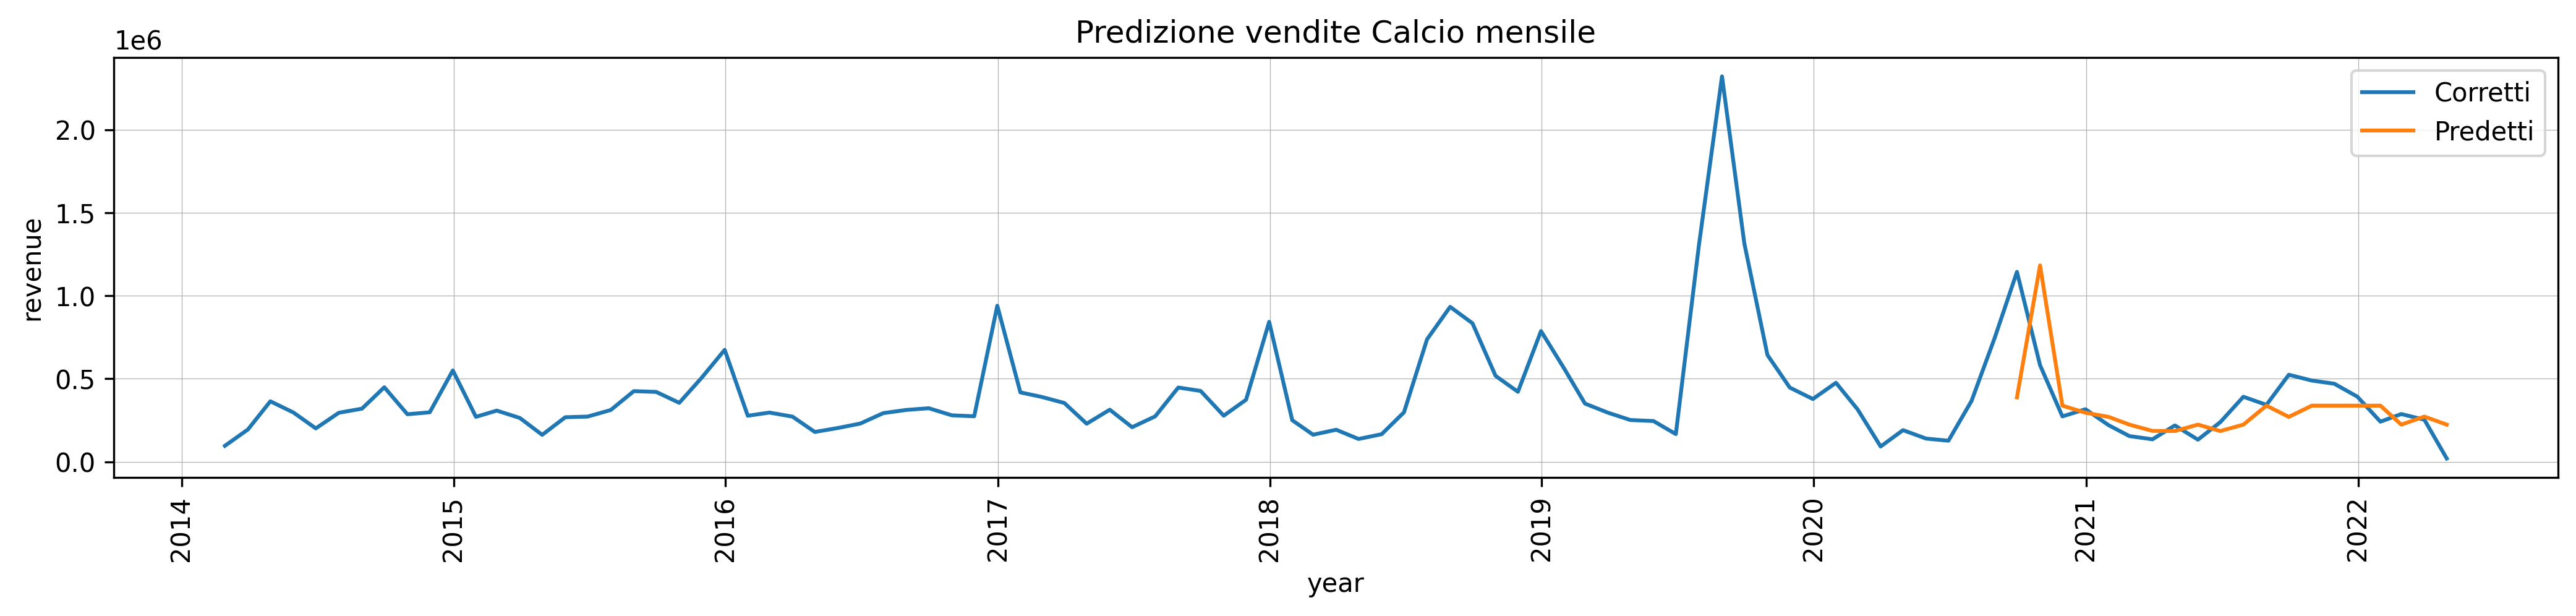

In [ ]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_calcio, x= "year", y='revenue', label= "Corretti" )     #_evalutation
sns.lineplot(data=calcio_evalutation_ds, x='year', y='predictions', palette= "red",  label= "Predetti")

#x = calcio_evalutation_ds['year']  
#y = calcio_evalutation_ds['predictions']
#for i,j in zip(x,y):
#  plt.annotate(str(j),xy=(i,j))
#
#y1 = calcio_evalutation_ds['revenue']
#for i,j in zip(x,y1):
#  plt.annotate(str(j),xy=(i,j))
#  calcio_evalutation_ds

plt.title("Predizione vendite Calcio mensile")

plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

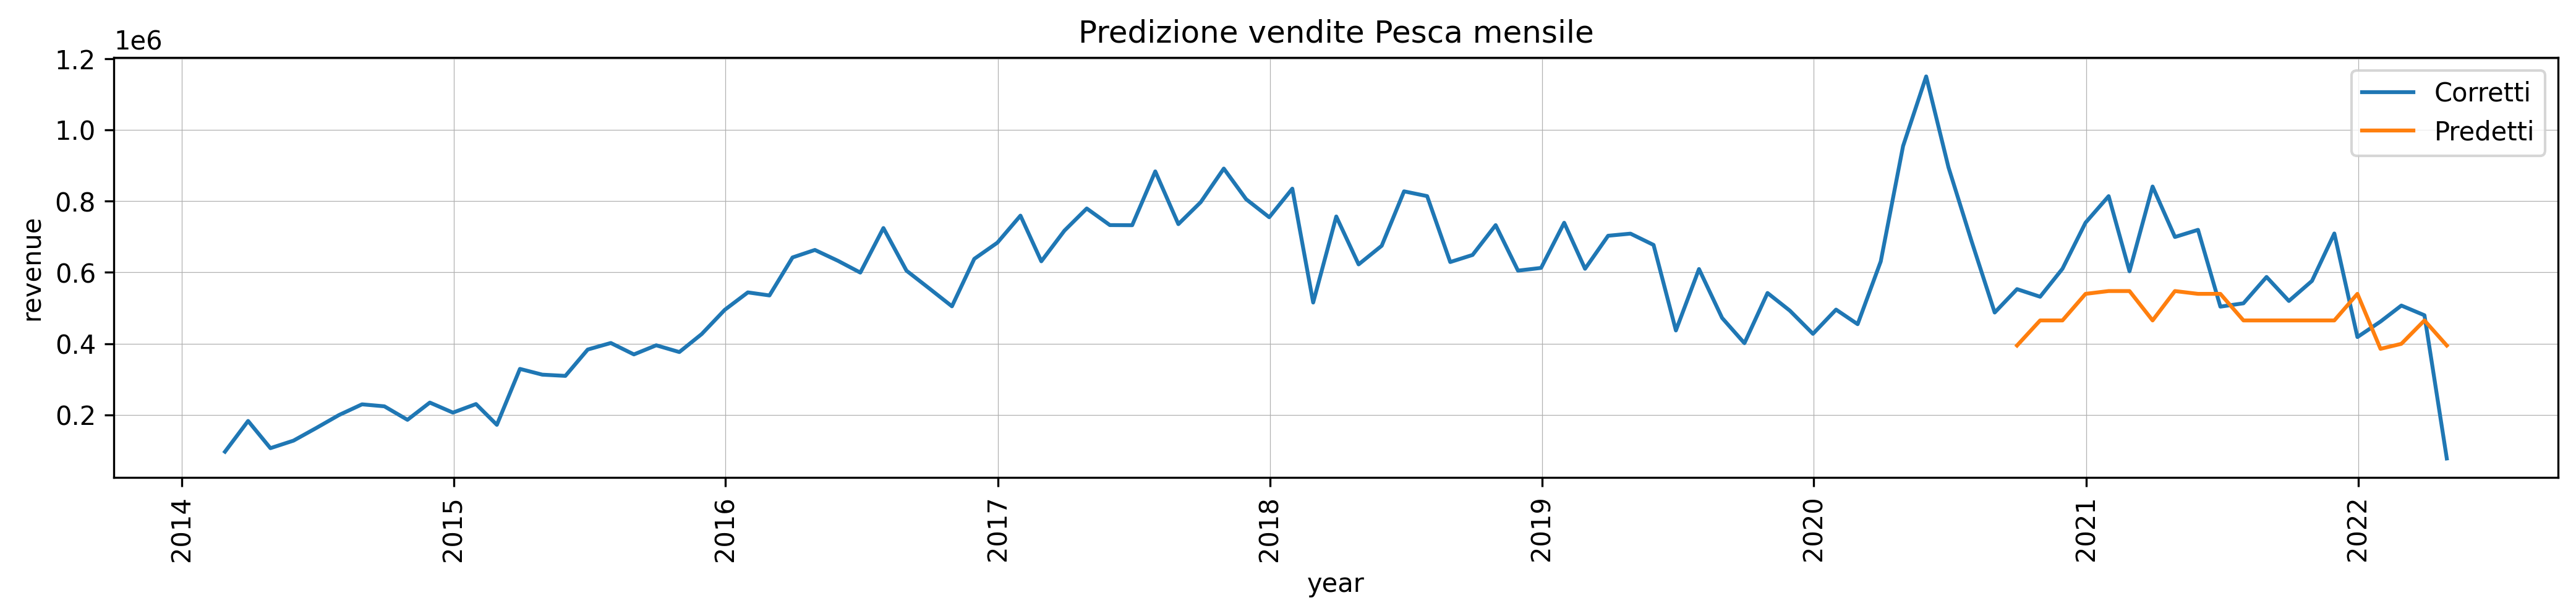

In [ ]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_pesca, x= "year", y='revenue', label= "Corretti")     
sns.lineplot(data=pesca_evalutation_ds, x='year', y='predictions', palette= "red", label= "Predetti") 

#x = pesca_evalutation_ds['year']  
#y = pesca_evalutation_ds['predictions']
#for i,j in zip(x,y):
#  plt.annotate(str(j),xy=(i,j))
#
#y1 = pesca_evalutation_ds['revenue']
#for i,j in zip(x,y1):
#  plt.annotate(str(j),xy=(i,j))
#  pesca_evalutation_ds

plt.title("Predizione vendite Pesca mensile")

plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

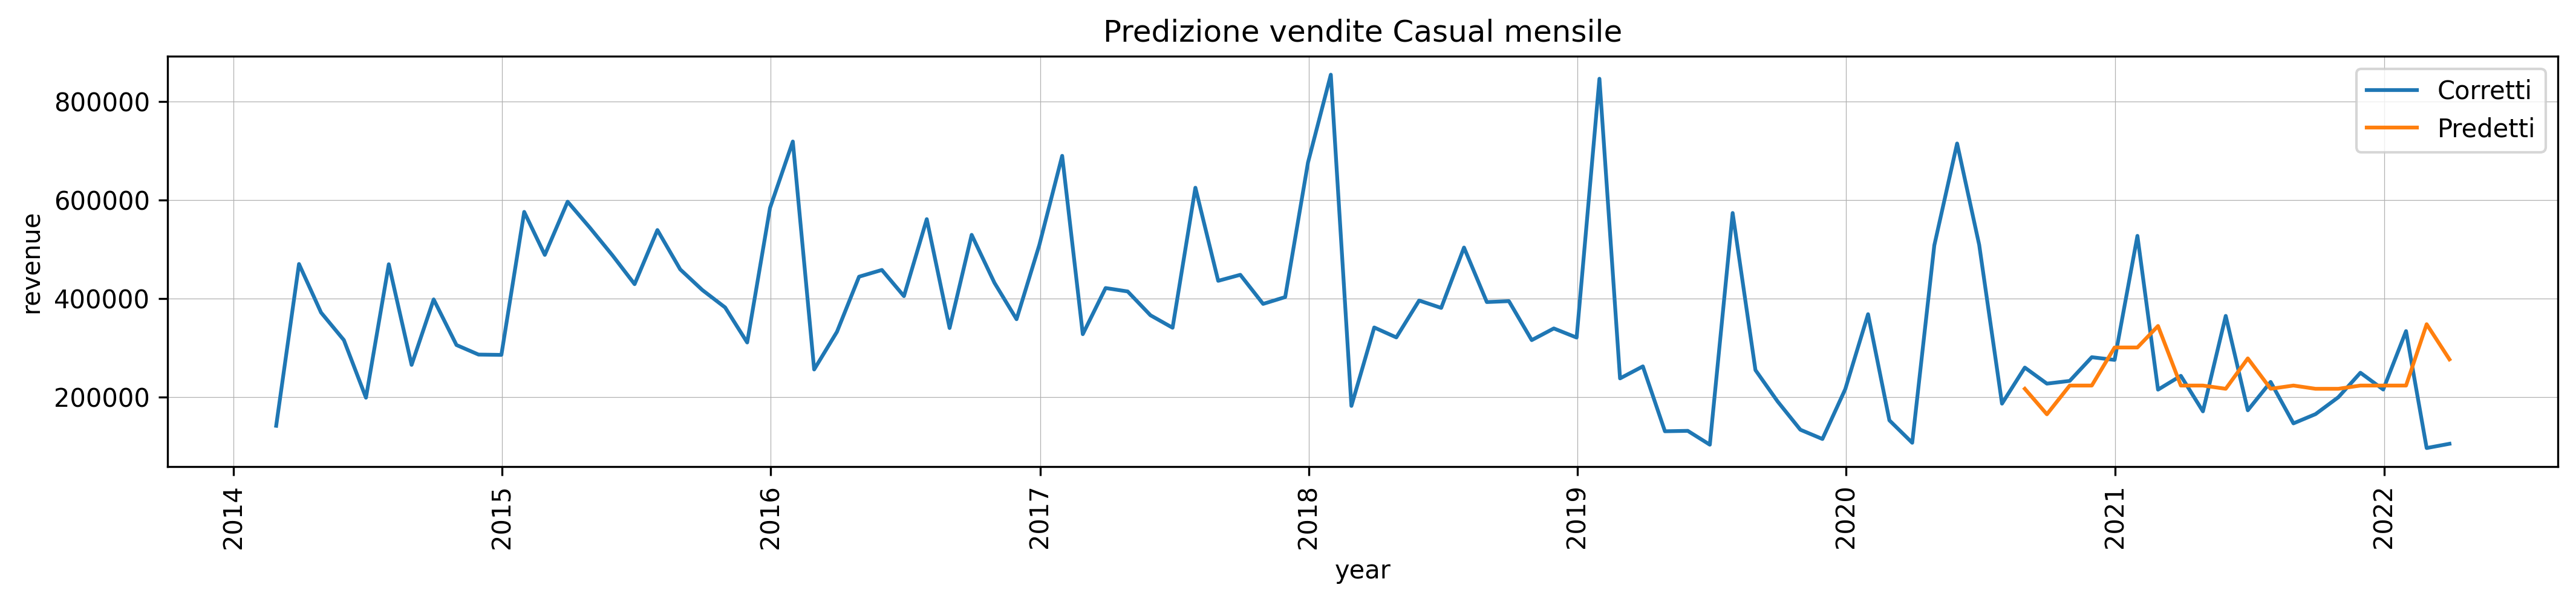

In [ ]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_casual, x= "year", y='revenue', label= "Corretti")     
sns.lineplot(data=casual_evalutation_ds, x='year', y='predictions', palette= "red", label= "Predetti") 

#x = casual_evalutation_ds['year']  
#y = casual_evalutation_ds['predictions']
#for i,j in zip(x,y):
#  plt.annotate(str(j),xy=(i,j))
#
#y1 = casual_evalutation_ds['revenue']
#for i,j in zip(x,y1):
#  plt.annotate(str(j),xy=(i,j))
#  casual_evalutation_ds

plt.title("Predizione vendite Casual mensile")

plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [ ]:
calcio_evalutation_ds

,year,revenue,totale_periodo_prec,predictions
0,2020-09-30,1143860.62,744662.00,3.875267e+05
1,2020-10-31,581780.80,1143860.62,1.182566e+06
2,2020-11-30,273004.54,581780.80,3.377667e+05
3,2020-12-31,316115.35,273004.54,2.950462e+05
4,2021-01-31,220170.52,316115.35,2.700977e+05
5,2021-02-28,154246.91,220170.52,2.233717e+05
6,2021-03-31,134986.46,154246.91,1.855325e+05
7,2021-04-30,218591.82,134986.46,1.848056e+05
8,2021-05-31,132760.41,218591.82,2.233717e+05
9,2021-06-30,238311.30,132760.41,1.848056e+05


In [ ]:
pesca_evalutation_ds

,year,revenue,totale_periodo_prec,predictions
0,2020-09-30,553079.33,487386.30,394737.87500
1,2020-10-31,531739.65,553079.33,465181.65625
2,2020-11-30,610337.83,531739.65,465181.65625
3,2020-12-31,739810.32,610337.83,539825.31250
4,2021-01-31,814191.95,739810.32,547709.18750
5,2021-02-28,603193.05,814191.95,547709.18750
6,2021-03-31,841232.01,603193.05,465181.65625
7,2021-04-30,699494.82,841232.01,547709.18750
8,2021-05-31,719593.94,699494.82,539825.31250
9,2021-06-30,503951.32,719593.94,539825.31250


In [ ]:
casual_evalutation_ds

,year,totale_periodo_prec,revenue,predictions
0,2020-08-31,186785.32,259979.55,216901.56250
1,2020-09-30,259979.55,227387.68,165145.53125
2,2020-10-31,227387.68,232932.72,223488.40625
3,2020-11-30,232932.72,281042.27,223488.40625
4,2020-12-31,281042.27,275545.76,300769.12500
5,2021-01-31,275545.76,527328.22,300769.12500
6,2021-02-28,527328.22,215185.48,344424.18750
7,2021-03-31,215185.48,243257.05,223488.40625
8,2021-04-30,243257.05,171086.47,223488.40625
9,2021-05-31,171086.47,364878.76,216901.56250


In [ ]:
print('Calcio XgBoost Mean Absolute Error (MAE): ', np.mean(np.abs(calcio_evalutation_ds["revenue"] - calcio_evalutation_ds["predictions"])))

Calcio XgBoost Mean Absolute Error (MAE):  146881.66215625004


In [ ]:
print('Pesca XgBoost Mean Absolute Error (MAE): ', np.mean(np.abs(pesca_evalutation_ds["revenue"] - pesca_evalutation_ds["predictions"])))

Pesca XgBoost Mean Absolute Error (MAE):  142630.93193749996


In [ ]:
print('Casual XgBoost Mean Absolute Error (MAE): ', np.mean(np.abs(casual_evalutation_ds["revenue"] - casual_evalutation_ds["predictions"])))

Casual XgBoost Mean Absolute Error (MAE):  80268.2155625


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
print('Calcio XgBoost Mean Absolute Percentage Error (MAPE): ', mean_absolute_percentage_error(calcio_evalutation_ds["revenue"], calcio_evalutation_ds["predictions"]))

Calcio XgBoost Mean Absolute Percentage Error (MAPE):  84.5864921798393


In [ ]:
print('Pesca XgBoost Mean Absolute Percentage Error (MAPE): ', mean_absolute_percentage_error(pesca_evalutation_ds["revenue"], pesca_evalutation_ds["predictions"]))

Pesca XgBoost Mean Absolute Percentage Error (MAPE):  40.25650067963962


In [ ]:
print('Casual XgBoost Mean Absolute Percentage Error (MAPE): ', mean_absolute_percentage_error(casual_evalutation_ds["revenue"], casual_evalutation_ds["predictions"]))

Casual XgBoost Mean Absolute Percentage Error (MAPE):  44.44374181521377


(150 estimator si adatta bene al dataset di calcio e casual con shift di 1 mese)
(Calcio migliore intorno ai 150)
(Pesca migliore intorno ai 300)
(Casual migliore intorno ai 150)




Con shift +1 mese


* Calcio XgBoost Mean Absolute Error (MAE):  146881.66215625004
* Pesca XgBoost Mean Absolute Error (MAE):  142630.93193749996
* Casual XgBoost Mean Absolute Error (MAE):  80268.2155625


* Calcio XgBoost Mean Absolute Percentage Error (MAPE):  84.59 %
* Pesca XgBoost Mean Absolute Percentage Error (MAPE):  40.26 % 
* Casual XgBoost Mean Absolute Percentage Error (MAPE):  44.44 %




Con shift +12 mesi


* Calcio XgBoost Mean Absolute Error (MAE):  156132.63637499997
* Pesca XgBoost Mean Absolute Error (MAE):  126345.48874999999
* Casual XgBoost Mean Absolute Error (MAE):  97402.72868750001


* Calcio XgBoost Mean Absolute Percentage Error (MAPE):  77.91 %
* Pesca XgBoost Mean Absolute Percentage Error (MAPE):  46.08 %
* Casual XgBoost Mean Absolute Percentage Error (MAPE):  48.97 %